In [ ]:
#copy the archive file
import os 
import shutil

print("Removing old folder")
# shutil.rmtree("/content/MLData")

archiveSource = "/content/drive/MyDrive/harvestHacks/archive.zip"

os.mkdir("/content/MLData/")

print("copying archive")
shutil.copy(archiveSource, "/content/MLData/archive.zip")
print("Done")

Removing old folder
copying archive
Done


In [ ]:
#unzip

from zipfile import ZipFile

zip = ZipFile("/content/MLData/archive.zip", 'r')

print("Extracting files now")

zip.extractall("/content/MLData")
print("done extracting")

Extracting files now
done extracting


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2


In [ ]:
image = cv2.imread("/content/MLData/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG")
image


from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen = ImageDataGenerator(rescale = 1.0/255)

train_dir = "/content/MLData/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
test_dir = "/content/MLData/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size =(256, 256),  
                  batch_size = 20)

test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size =(256, 256),
                    batch_size = 20)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

def cnn1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((3, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense((1568), activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense((38), activation='softmax'))
    model.compile(optimizer='adam', metrics='Accuracy', loss='categorical_crossentropy')
    return model

In [ ]:
model_1=cnn1()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

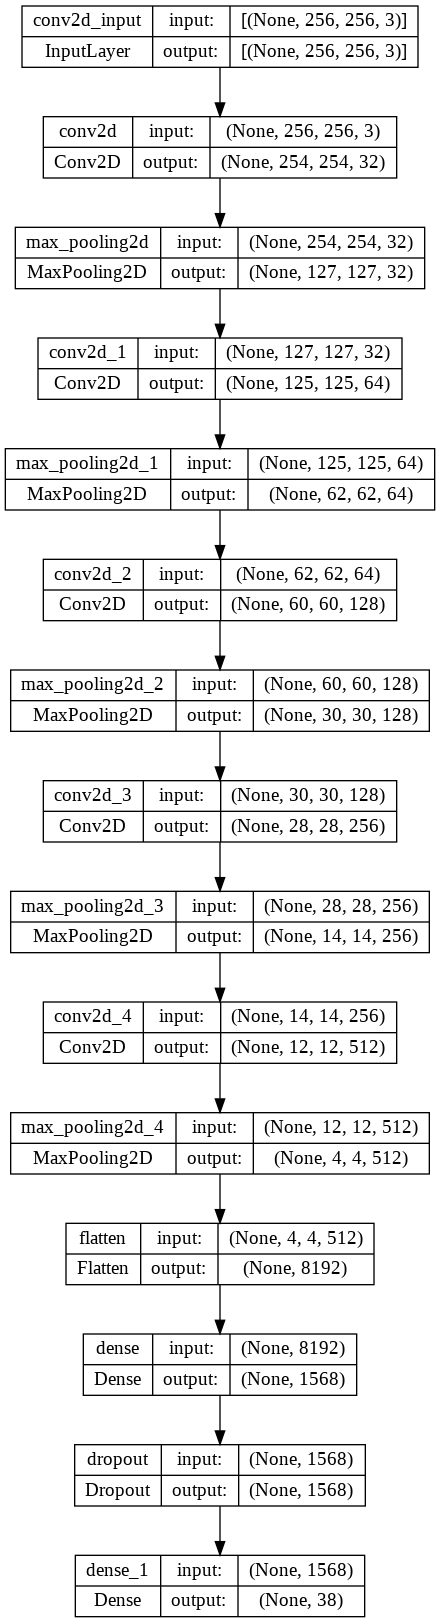

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
m1_res = model_1.fit_generator(train_generator,
             epochs = 7,
             validation_data = test_generator,
             steps_per_epoch=1200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/7
1200/1200 [==============================] - 152s 118ms/step - loss: 2.1829 - Accuracy: 0.3762 - val_loss: 1.0715 - val_Accuracy: 0.6756
Epoch 2/7
1200/1200 [==============================] - 125s 104ms/step - loss: 0.8463 - Accuracy: 0.7357 - val_loss: 0.5298 - val_Accuracy: 0.8329
Epoch 3/7
1200/1200 [==============================] - 120s 100ms/step - loss: 0.5394 - Accuracy: 0.8314 - val_loss: 0.4047 - val_Accuracy: 0.8688
Epoch 4/7
1200/1200 [==============================] - 118s 98ms/step - loss: 0.4156 - Accuracy: 0.8669 - val_loss: 0.3004 - val_Accuracy: 0.9033
Epoch 5/7
1200/1200 [==============================] - 118s 99ms/step - loss: 0.3446 - Accuracy: 0.8881 - val_loss: 0.2817 - val_Accuracy: 0.9089
Epoch 6/7
1200/1200 [==============================] - 120s 100ms/step - loss: 0.3008 - Accuracy: 0.9028 - val_loss: 0.2470 - val_Accuracy: 0.9183
Epoch 7/7
1200/1200 [==============================] - 117s 97ms/step - loss: 0.2624 - Accuracy: 0.9152 - val_loss: 0.20

In [ ]:
m1_saved = model_1.save("./model.h5")

In [ ]:


from PIL import Image

model=tf.keras.models.load_model("/content/model.h5")


def predictDisease2(imPath):
  img = Image.open(imPath).resize((256, 256))
  imgArr= np.asarray(img)
  ready = np.expand_dims(imgArr, axis=0)

  classes = model.predict(ready, verbose = 0).tolist()
  return classes

In [16]:


typeList = os.listdir("/content/MLData/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid")

for typeType in typeList:
  appendList=[]
  files = os.listdir(os.path.join("/content/MLData/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", typeType))

  for fileType in files:
    classes=predictDisease2(os.path.join("/content/MLData/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/", typeType, fileType))
    maxVal = max(classes[0])
    appendList.append(classes[0].index(maxVal))


  print(typeType, max(set(appendList), key=appendList.count))


# for file in files:
#   classes=predictDisease2(os.path.join("/content/MLData/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/", file))
#   maxVal = max(classes[0])

#   print(classes[0].index(maxVal))

Peach___Bacterial_spot 22
Tomato___Late_blight 22
Cherry_(including_sour)___Powdery_mildew 22
Pepper,_bell___Bacterial_spot 19
Potato___healthy 22
Orange___Haunglongbing_(Citrus_greening) 22
Corn_(maize)___healthy 22
Raspberry___healthy 23
Tomato___Tomato_mosaic_virus 36
Tomato___Bacterial_spot 22
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot 22
Apple___healthy 1
Pepper,_bell___healthy 19
Corn_(maize)___Northern_Leaf_Blight 22
Potato___Early_blight 22
Blueberry___healthy 4
Apple___Apple_scab 22
Tomato___Spider_mites Two-spotted_spider_mite 36
Grape___Esca_(Black_Measles) 12
Apple___Cedar_apple_rust 22
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) 22
Grape___Black_rot 1
Strawberry___Leaf_scorch 26
Grape___healthy 22
Tomato___Target_Spot 34
Apple___Black_rot 1
Tomato___Tomato_Yellow_Leaf_Curl_Virus 23
Soybean___healthy 22
Tomato___healthy 37
Corn_(maize)___Common_rust_ 8
Tomato___Leaf_Mold 36
Potato___Late_blight 22
Squash___Powdery_mildew 22
Cherry_(including_sour)___healthy 19
Peach_

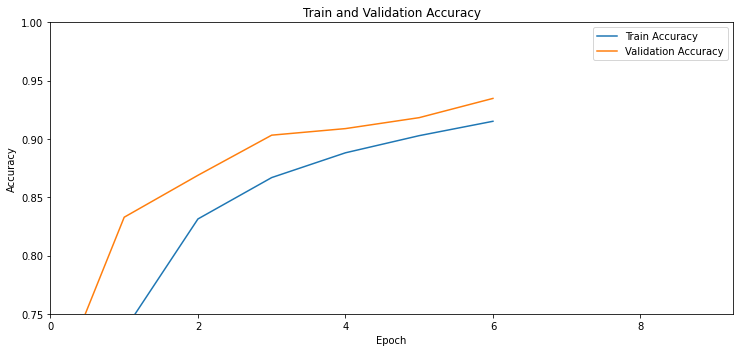

In [ ]:
plt.figure(figsize = (20,5))
# plt.subplot(1,2,1)
# plt.title("Train and Validation Loss")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.plot(m1_res.history['loss'],label="Train Loss")
# plt.plot(m1_res.history['val_loss'], label="Validation Loss")
# plt.xlim(0, 10)
# plt.ylim(0.0,1.0)
# plt.legend()
# plt.show()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(m1_res.history['Accuracy'], label="Train Accuracy")
plt.plot(m1_res.history['val_Accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# label_map = (train_generator.class_indices)

# inv_map = {v: k for k, v in label_map.items()}


label_map ={'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Tomato___Late_blight': 30,
 'Tomato___Leaf_Mold': 31,
 'Tomato___Septoria_leaf_spot': 32,
 'Tomato___Spider_mites Two-spotted_spider_mite': 33,
 'Tomato___Target_Spot': 34,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 35,
 'Tomato___Tomato_mosaic_virus': 36,
 'Tomato___healthy': 37}

inv_map = {v: k for k, v in label_map.items()}

inv_map

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '